In [ ]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cashe -fv
!rm ~/.cache/matplotlib -rf
# 순서 : 마운트초기화 > 폰트설치 > 런타임다시시작 > 구글드라이브 마운트 > 나머지 코드...

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
import os
path = '/content/drive/MyDrive/1차프로젝트/data'
file_list = ['경쟁사이용.txt', '고객DEMO.txt', '멤버십여부.txt', '상품분류.txt', '채널이용.txt']
Ldata = {}

for file in file_list:
  data = pd.read_csv(f'{path}/{file}',encoding='cp949') # 경로에 있는 파일 데이터프레임으로 불러오기
  data_name = file.replace('.txt', '') # 사전형 데이터로 만들기 위해 키값으로 삼을 파일명 생성
  Ldata[data_name] = data

dt_parser = lambda x: datetime.datetime.strptime(x, "%Y%m%d")
Ldata['구매상품'] = pd.read_csv('/content/drive/MyDrive/1차프로젝트/data/구매상품TR.txt',encoding='CP949', parse_dates=['구매일자'], date_parser=dt_parser)

In [ ]:
Ldata.keys()

dict_keys(['경쟁사이용', '고객DEMO', '멤버십여부', '상품분류', '채널이용', '구매상품'])

In [ ]:
print('< NULL 개수 >')
for i in Ldata.keys():
    null = Ldata[i].isnull().sum()
    null_colname = null[null>0].index
    null_count = null[null>0].values
    if len(null_count) ==0 :
        null_colname = 'X'
        null_count = ''
    print(f'{i} - {null_colname[0]} {null_count}')

< NULL 개수 >
경쟁사이용 - X 
고객DEMO - 거주지역 [178]
멤버십여부 - X 
상품분류 - X 
채널이용 - X 
구매상품 - X 


In [ ]:
Ldata['고객DEMO']

In [ ]:
고객 = Ldata['고객DEMO'].거주지역[Ldata['고객DEMO'].거주지역.isnull()==True].index
거주지미표기고객번호 = Ldata['고객DEMO'].iloc[고객,[0,3]]
거주지미표기고객번호

# 각 테이블 출력

In [ ]:
Ldata.keys()

dict_keys(['경쟁사이용', '고객DEMO', '멤버십여부', '상품분류', '채널이용', '구매상품'])

In [ ]:
# 1. 경쟁사이용
Ldata['경쟁사이용']

In [ ]:
# 2. 고객DEMO
Ldata['고객DEMO']

In [ ]:
# 2. 멤버십여부
Ldata['멤버십여부']

In [ ]:
# 3. 상품분류
Ldata['상품분류']

In [ ]:
# 4. 채널이용
Ldata['채널이용']

In [ ]:
# 5. 구매상품
Ldata['구매상품']

In [ ]:
Ldata['구매상품'].소분류코드.value_counts()

In [ ]:
# 1-1 고객당 이용 회수
고객당이용회수 = Ldata['경쟁사이용'].고객번호.value_counts()
고객당이용회수

In [ ]:
import pandas as pd
df = pd.DataFrame(고객당이용회수)
df1 = df.reset_index()
plt.rc('font', family='NanumBarunGothic') # 한글처리해주기위한거
df1.columns = ['고객번호', '이용횟수']
df1

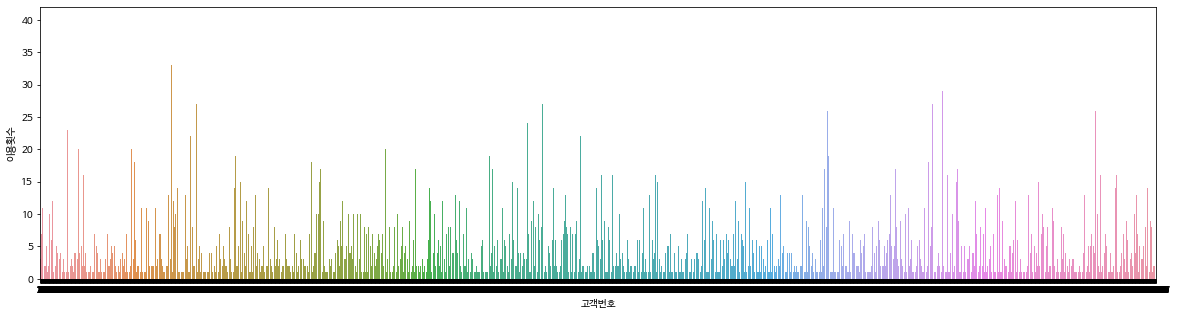

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,5))
sns.barplot(x='고객번호', y='이용횟수', data=df1, orient='v')

#### 고객번호로 데이터를 합칠 수 있는지 보기위해서 고객번호가 포함된 데이터 테이블을 점검
- 경쟁사이용_df
- 고객DEMO_df
- 멤버십_df
- 채널이용_df

In [ ]:
Ldata.keys()

dict_keys(['경쟁사이용', '고객DEMO', '멤버십여부', '상품분류', '채널이용', '구매상품'])

In [ ]:
list(Ldata.keys())[0]
Ldata['경쟁사이용'].info()

In [ ]:
# def 년월일분해(테이블명,컬럼명):
#   Ldata[f'{테이블명}']['년']=Ldata[f'{테이블명}'][f'{컬럼명}'].dt.year
#   Ldata[f'{테이블명}']['월']=Ldata[f'{테이블명}'][f'{컬럼명}'].dt.month
#   Ldata[f'{테이블명}']['일']=Ldata[f'{테이블명}'][f'{컬럼명}'].dt.day
#   Ldata[f'{테이블명}'] = Ldata[f'{테이블명}'].drop(f'{컬럼명}', axis=1)
#   return Ldata[f'{테이블명}']

# Ldata[list(Ldata.keys())[0]]
Ldata['경쟁사이용']['년'] = pd.to_datetime(Ldata['경쟁사이용']['이용년월'] , format='%Y%m').dt.year
Ldata['경쟁사이용']['월'] = pd.to_datetime(Ldata['경쟁사이용']['이용년월'] , format='%Y%m').dt.month
Ldata['경쟁사이용'] = Ldata['경쟁사이용'].drop('이용년월', axis=1)
Ldata['경쟁사이용']

In [ ]:
# 각 파일마다 고객번호 중복 최대값
for file in list(Ldata.keys()):
  print(file, Ldata[file].iloc[:,0].value_counts().max())
# #     print(j.고객번호.value_counts())
# 각 테이블당 겹체는 고객번호의 개수를 세봣더니 1개를 초과하고 각각의 파일마다 개수가 다른걸 봐서는 단순합치기는 불가상태

In [ ]:
# 년월일 분류
Ldata['구매상품']['년']=Ldata['구매상품'].구매일자.dt.year
Ldata['구매상품']['월']=Ldata['구매상품'].구매일자.dt.month
Ldata['구매상품']['일']=Ldata['구매상품'].구매일자.dt.day
Ldata['구매상품'] = Ldata['구매상품'].drop('구매일자', axis=1)
Ldata['구매상품']

# 분기별로 데이터 분리 분석(년/월/일/계절별 + 시간대별)

In [ ]:
# 분기별로 데이터 분리 분석(년/월/일/계절별 + 시간대별)
# 분기 : 1.봄, 2.여름, 3.가을, 4.겨울
# 같이 고민할 부분 1년을 기준으로 1 2 3 4 분기를 나눌것인지 12 1 2, 3 4 5, 6 7 8, 9 10 11 이렇게 계절로 나눠야할 것인지
# 기준정보 논의 1. 분기or계절, 2.월초,월중,월말, 3.시간분류 낮 밤 아침 새벽 or 낮,밤 or 아침,점심,저녁 몇시를 기준으로 할지
def month_quarter(x):
  q = 0
  if x <=3: q = 1
  elif x <=6: q = 2
  elif x <=9: q = 3
  elif x <=12: q = 4
  return q

def day_parts(x):
  q = 0
  if x <=7: q = '1'
  elif x <=14: q = '2'
  elif x <=21: q = '3'
  else : q = '4'
  return q

# 고려대학교 정보 보호대학원 빅데이터 응용 및 보안학과
# 유통채널 소비분석(대형마트 소비 감소를 중심으로) 논문에 나온 시간분류 참고.
def time_parts(x):
  q = 0
  if x <=10: q = '새벽&오전'
  elif x <=17: q = '오후'
  elif x <=20: q = '저녁'
  else : q = '밤'
  return q

Ldata['구매상품']['분기'] = Ldata['구매상품']['월'].apply(lambda x : month_quarter(x))
Ldata['구매상품']['주차'] = Ldata['구매상품']['일'].apply(lambda x : day_parts(x))
Ldata['구매상품']['구매시간대'] = Ldata['구매상품']['구매시간'].apply(lambda x : time_parts(x))
Ldata['구매상품']

In [ ]:
Ldata['구매상품']['소분류코드'].value_counts()

In [ ]:
# 로컬파일불러오기
from google.colab import files
upload = files.upload()
import io
df = pd.read_csv(io.StringIO(upload['상품분류.csv'].decode('utf-8')))

Saving 상품분류.csv to 상품분류.csv


In [ ]:
df=df[['소분류코드', '분류 체계', '중분류명', '소분류명']]
df

In [ ]:
df1 = pd.merge(Ldata['구매상품'], Ldata['고객DEMO'],on='고객번호',how='outer')
df2 = pd.merge(df1, df, on='소분류코드', how='outer')
df2.head()

In [ ]:
# 피클로 파일 저장
import pickle
with open("/content/drive/MyDrive/1차프로젝트/data/ldata(분기주차구매시간생성).pkl", "wb") as tf: pickle.dump(Ldata,tf)

In [ ]:
# # 피클파일 불러오기
# import pickle
# with open("/content/drive/MyDrive/1차프로젝트/data/ldata.pkl", "rb") as tf: Ldata = pickle.load(tf)

In [ ]:
# 잘 됐나 확인
Ldata['구매상품'][Ldata['구매상품']['월']==3]

In [ ]:
# 널값 
Ldata['구매상품'].isnull().sum()

In [ ]:
# 2014년 데이터
df_2014 = Ldata['구매상품'][Ldata['구매상품']['년']==2014]
df_2015 = Ldata['구매상품'][Ldata['구매상품']['년']==2015]

In [ ]:
df_2015.reset_index()
df

In [ ]:
df.index.value_counts()

In [ ]:
# 제휴사별 판매금액
= 구매상품_df.groupby(['제휴사', '년']).구매금액.sum()

In [ ]:
t=구매상품_df.groupby('제휴사').구매금액.sum()
t[0]/(t.sum())
# A,B,C,D 순서대로 판매량이 높으며 A 제휴사가 전체 매출의 76%를 차지하고 있음

In [ ]:
# 가장 판매비중이 높은 A제휴사의 고객별 구매량을 탐색해보자
A_buy = 구매상품_df[구매상품_df.제휴사=='A'].groupby('고객번호').sum().sort_values(by = '구매금액', ascending = False)
# 총매출액 = A_buy.구매금액.sum()
A_buy['매출기여도(%)'] = np.round((A_buy.구매금액/A_buy.구매금액.sum())*100, 2)
A_buy

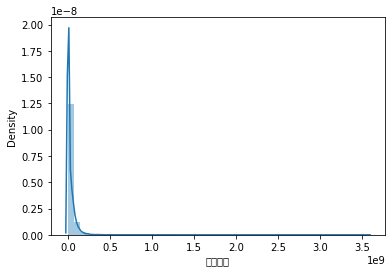

In [ ]:
# A사를 이용한 고객들의 구매금액을 시각화 해보면
sns.distplot(A_buy.구매금액)


In [ ]:
a_out = A_buy.reset_index()
a_out

In [ ]:
sns.barplot(x='고객번호', y='구매금액', data=a_out, orient='v')
# 오래걸려서 일단 패스 10분쯤 기다려도 안나옴..

In [ ]:
# 고객데이터에 A제휴사에서 소비한 금액 추가
guest_atbuy = a_out.loc[:, ['고객번호', '구매금액']]
gst_abuy = pd.merge(고객DEMO_df, guest_atbuy ,on='고객번호', how='outer')
gst_abuy1 = gst_abuy.rename(columns={'구매금액':'A사구매금액'})
gst_abuy1

In [ ]:
B_buy = 구매상품_df[구매상품_df.제휴사=='B'].groupby('고객번호').sum()
B_buy = B_buy.reset_index()
guest_buy = B_buy.loc[:, ['고객번호', '구매금액']]
guest_buy

In [ ]:
# B,C,D사에서도 구매한 금액을 합쳐보자
B_buy = 구매상품_df[구매상품_df.제휴사=='B'].groupby('고객번호').sum()
B_buy = B_buy.reset_index()
gst_abuy = pd.merge(gst_abuy1, B_buy.loc[:, ['고객번호', '구매금액']],on='고객번호', how='outer')
gst_totalbuy = gst_abuy.rename(columns={'구매금액':'B사구매금액'})

C_buy = 구매상품_df[구매상품_df.제휴사=='C'].groupby('고객번호').sum()
C_buy = C_buy.reset_index()
gst_totalbuy  = pd.merge(gst_totalbuy, C_buy.loc[:, ['고객번호', '구매금액']],on='고객번호', how='outer')
gst_totalbuy = gst_totalbuy.rename(columns={'구매금액':'C사구매금액'})

D_buy = 구매상품_df[구매상품_df.제휴사=='D'].groupby('고객번호').sum()
D_buy = D_buy.reset_index()
gst_totalbuy  = pd.merge(gst_totalbuy, D_buy.loc[:, ['고객번호', '구매금액']],on='고객번호', how='outer')
gst_totalbuy = gst_totalbuy.rename(columns={'구매금액':'D사구매금액'})

gst_totalbuy

In [ ]:
# NAN값은 구매를 안한경우 이므로 0값으로 대체
gst_totalbuy.isnull().sum()

In [ ]:
# 구매금액의 널값은 0으로 대체하고 거주지역의 널값은 아직 고려해야할 사항이므로 유지
gst_totalbuy
df = gst_totalbuy.fillna(value=0)
df.거주지역 = gst_totalbuy.거주지역
df['총구매금액'] = df['A사구매금액']+df['B사구매금액']+df['C사구매금액']+df['D사구매금액']
df

In [ ]:
# 연령대별 제휴사 구매금액을 살펴보자
# 연령대별 구매기여도를 2가지 측면에서 볼 계획이다.
# 총액, 평균금액.
# 총액만 고려할 경우 연령대별 소비패턴을 파악하기 힘들고
# 평균 금액만 고려할 경우 특정 손님의 기여도 적용이 안됨.
df_sum = df.groupby('연령대').sum()
df_sum

In [ ]:
plt.figure(figsize=(10,5))
그래프 = df_sum.reset_index()
# plt.rc('font', family='NanumBarunGothic') # 한글처리해주기위한거
sns.barplot(x='연령대', y='총구매금액', data=그래프)
# 구매기여도는 35~54세가 가장 많은 기여를 하고 있고 10~24의 기여도는 많이 낮다.

In [ ]:
df_mean = df.groupby('연령대').mean()
df_mean

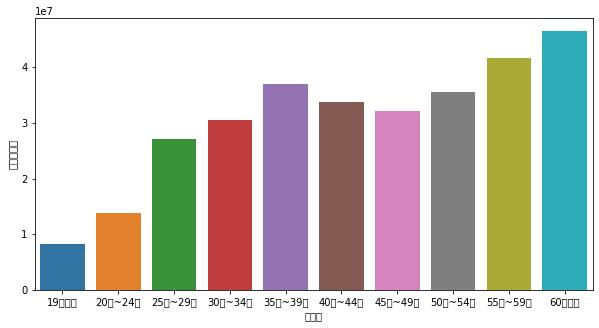

In [ ]:
plt.figure(figsize=(10,5))
그래프 = df_mean.reset_index()
plt.rc('font', family='NanumBarunGothic') # 한글처리해주기위한거
sns.barplot(x='연령대', y='총구매금액', data=그래프)

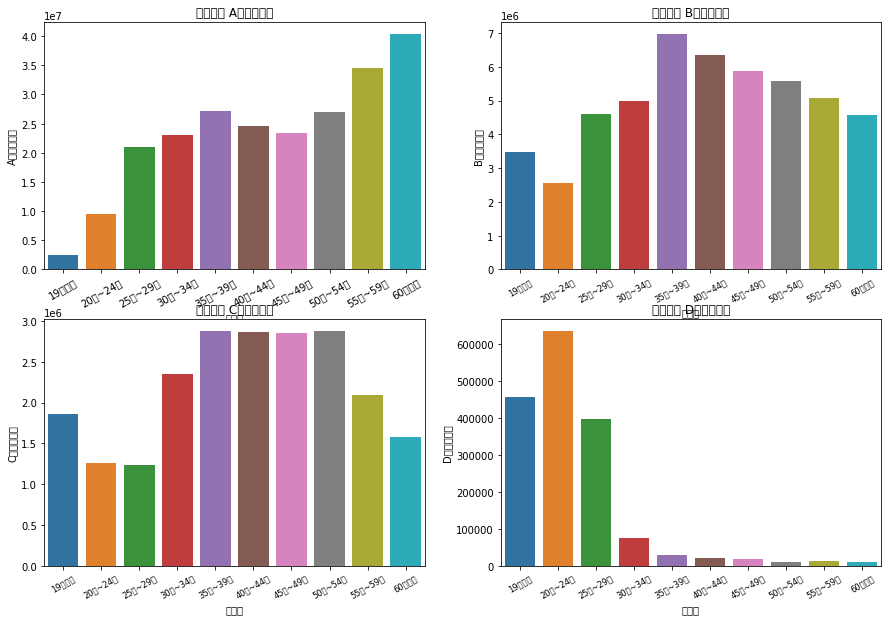

In [ ]:
# 남녀 성비 구분없이 각 연령대별 제휴사 구매액수
# 각 제휴사의 연령대별 구매액 (여성)
plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(15,10))
# fig.autofmt_xdate (rotation =45)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.set_title('연령대별 A사구매금액')
ax2.set_title('연령대별 B사구매금액')
ax3.set_title('연령대별 C사구매금액')
ax4.set_title('연령대별 D사구매금액')

ax1.set_xticklabels(그래프.연령대, rotation=30)
ax2.set_xticklabels(그래프.연령대, rotation=30)
ax3.set_xticklabels(그래프.연령대, rotation=30)
ax4.set_xticklabels(그래프.연령대, rotation=30)


sns.barplot(x='연령대', y='A사구매금액', data=그래프, ax=ax1)
sns.barplot(x='연령대', y='B사구매금액', data=그래프, ax=ax2)
sns.barplot(x='연령대', y='C사구매금액', data=그래프, ax=ax3)
sns.barplot(x='연령대', y='D사구매금액', data=그래프, ax=ax4)

In [ ]:
# 10대, 20대의 구매소비율이 다른 연령대에비해 높지 않다. 마트가 껴있어서 그렇게 나온걸 수도 있으므로 각 계열사마다 소비그래프를 남여로 분류하여 지켜보자
# 각 계열사마다 봤을때도 특정 연령대가 소비율이 낮다면 구매욕구를 일으킬 수 있는 마캐팅 수단이 필요해 보인다.
# 이미 데이터를 가지고 있으므로 탐색적 분석(통계, 시각화)를 통해 이슈 파인딩을 하고 팀원들과 브레인스토밍을 해야함.

In [ ]:
# 회사에대해서 내일 통계적으로 설명할 수 있어야한다.(데이터탐색을많이 해야 가능함)

In [ ]:
# 위 그래프에서는 총액을 기반으로 알아봤기 때문에 성별과, 특정 계열사에서 어느 연령대가 주 고객층인지 파악이 되지 않는 단점이 있어서
# 각 계열사마다 남, 녀 성비를 구분해 다시 알아보려한다.

# 1. 남, 녀 성별을 구분하고 ABCD 각각의 연령대별 구매기여도를 알아보자.
성별분류 = df.groupby('성별')
성별분류

In [ ]:
여자시점구매액 = list(성별분류)[0][1]
여자시점구매액

In [ ]:
여성연령별구매금액 = 여자시점구매액.groupby('연령대').sum()
여성연령별구매금액1 = 여성연령별구매금액.drop(['고객번호', '거주지역'], axis=1)
여성연령별구매금액2 = 여성연령별구매금액.drop(['고객번호', '거주지역'], axis=1).reset_index()
여성연령별구매금액1 # 1은 연령을 인덱스에 둔거, 2는 인덱스에서 뺀거

Text(0.5, 1.0, '연령대별 각 계열사에 대한 여성 구매액')

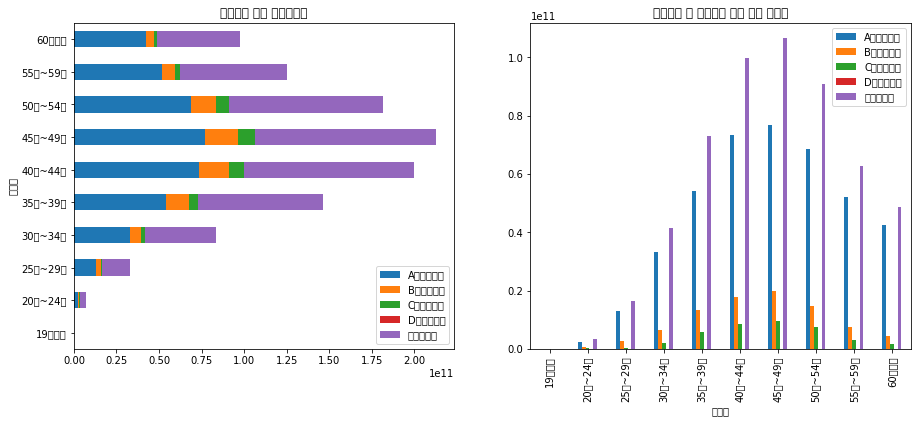

In [ ]:
# 연령대별 구매액(여성)
plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
여성연령별구매금액1.plot(kind='barh',stacked=True, ax=ax1)
여성연령별구매금액1.plot(kind='bar', ax=ax2)
ax1.set_title('연령대별 여성 구매누적액')
ax2.set_title('연령대별 각 계열사에 대한 여성 구매액')

In [ ]:
# 연령대별 여성 구매누적액
여성연령별구매금액1.plot(kind='barh',stacked=True)

In [ ]:
# 연령대별 각 계열사에 대한 여성 구매액
plt.figure(figsize=(4,5))
여성연령별구매금액1.plot(kind='bar')

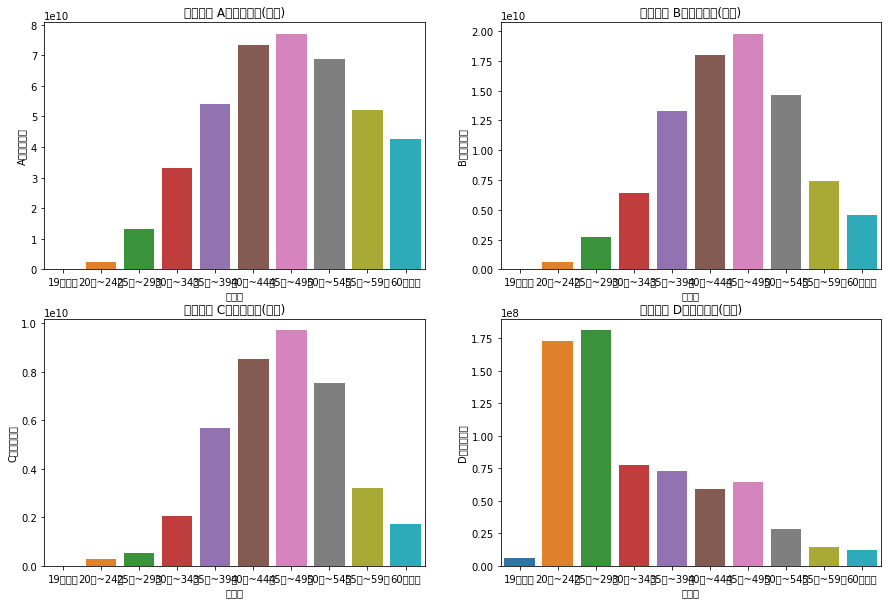

In [ ]:
# 각 제휴사의 연령대별 구매액 (여성)
plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.set_title('연령대별 A사구매금액(여성)')
ax2.set_title('연령대별 B사구매금액(여성)')
ax3.set_title('연령대별 C사구매금액(여성)')
ax4.set_title('연령대별 D사구매금액(여성)')

sns.barplot(x='연령대', y='A사구매금액', data=여성연령별구매금액2, ax=ax1)
sns.barplot(x='연령대', y='B사구매금액', data=여성연령별구매금액2, ax=ax2)
sns.barplot(x='연령대', y='C사구매금액', data=여성연령별구매금액2, ax=ax3)
sns.barplot(x='연령대', y='D사구매금액', data=여성연령별구매금액2, ax=ax4)

In [ ]:
남자시점구매액 = list(성별분류)[1][1]
남자시점구매액

In [ ]:
남성연령별구매금액 = 남자시점구매액.groupby('연령대').sum()
남성연령별구매금액1 = 남성연령별구매금액.drop(['고객번호', '거주지역'], axis=1)
남성연령별구매금액2 = 남성연령별구매금액.drop(['고객번호', '거주지역'], axis=1).reset_index()
남성연령별구매금액1 # 1은 연령을 인덱스에 둔거, 2는 인덱스에서 뺀거

In [ ]:
# 연령대별 구매액 (남성)
plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
남성연령별구매금액1.plot(kind='barh',stacked=True, ax=ax1)
남성연령별구매금액1.plot(kind='bar', ax=ax2)
ax1.set_title('연령대별 남성 구매누적액')
ax2.set_title('연령대별 각 계열사에 대한 남성 구매액')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 각 제휴사의 연령대별 구매액 (남성)
plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.set_title('연령대별 A사구매금액(남성)')
ax2.set_title('연령대별 B사구매금액(남성)')
ax3.set_title('연령대별 C사구매금액(남성)')
ax4.set_title('연령대별 D사구매금액(남성)')


sns.barplot(x='연령대', y='A사구매금액', data=남성연령별구매금액2, ax=ax1)
sns.barplot(x='연령대', y='B사구매금액', data=남성연령별구매금액2, ax=ax2)
sns.barplot(x='연령대', y='C사구매금액', data=남성연령별구매금액2, ax=ax3)
sns.barplot(x='연령대', y='D사구매금액', data=남성연령별구매금액2, ax=ax4)